# Clean Speech: Variational Autoencoder

In [17]:
import tensorflow as tf
print("TensorFlow Version: " + str(tf.__version__))

TensorFlow Version: 2.5.0


In [18]:
import sys
sys.path.insert(0, './modules')

import numpy as np
import time

from vae import VAE
from encoder import Encoder
from decoder import Decoder

from loss_function import itakura_saito_elbo
from data_utils import get_dataset_from_file

## Load Data

In [19]:
###### Load datasets and set sizes & shapes ######
DATA_BASE_DIR = '/Users/ben/Test/data/archive/data'

train_ds = get_dataset_from_file(
    os.path.join(DATA_BASE_DIR, 'train.pckl'))
test_ds = get_dataset_from_file(
    os.path.join(DATA_BASE_DIR, 'test.pckl'))

Load pickle file "/Users/ben/Test/data/archive/data/train.pckl"
Dataset shape: (450022, 513)
Load pickle file "/Users/ben/Test/data/archive/data/test.pckl"
Dataset shape: (164457, 513)


## Training

In [20]:
###### Initialize encoder, decoder, VAE ######
inp_shape=(513,1)
latent_dim=32
net='clean_speech'
loss_fn=itakura_saito_elbo

enc = Encoder(inp_shape=inp_shape, latent_dim=latent_dim, net=net)
dec = Decoder(outp_shape=inp_shape, latent_dim=latent_dim, net=net)

vae = VAE(enc, dec, loss_fn)


++++ VARIATIONAL AUTOENCODER ++++

clean_speech-Encoder
 - Input Shape: (513, 1)
 - Latent Variable Space: 32

clean_speech-Decoder
 - Latent Variable Space: 32
 - Output Shape: (513, 1)

Initialize Metrics:
 - train_loss
 - test_loss


Progress - Runtime 250.33 s:
Epoch 25/25, Loss: 2845.67, Test Loss: 2521.51, Time: 9.83 s


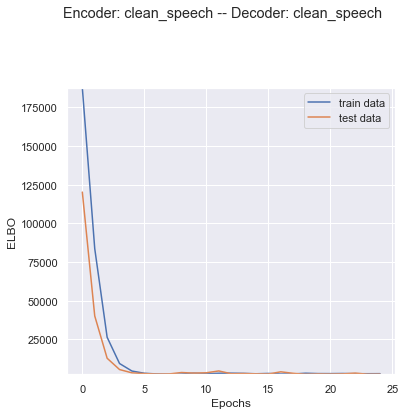


Reset Metrics

---- FINISHED ----


In [21]:
###### Training ######
epochs = 25
lr = 1e-5

vae.fit(train_ds, test_ds, epochs=epochs, lr=lr, plot_losses=True)